<a href="https://colab.research.google.com/github/Lakshmipriya-BM/ML-MAJOR-JUNE/blob/main/Prediction_of_Diabetics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import xgboost
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier as rfc

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import confusion_matrix

from mlxtend.plotting import plot_confusion_matrix


In [3]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
print('Total number of rows are:',df.shape[0])
print('Total number of columns are:',df.shape[1])

Total number of rows are: 768
Total number of columns are: 9


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.isna().sum(axis=0)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


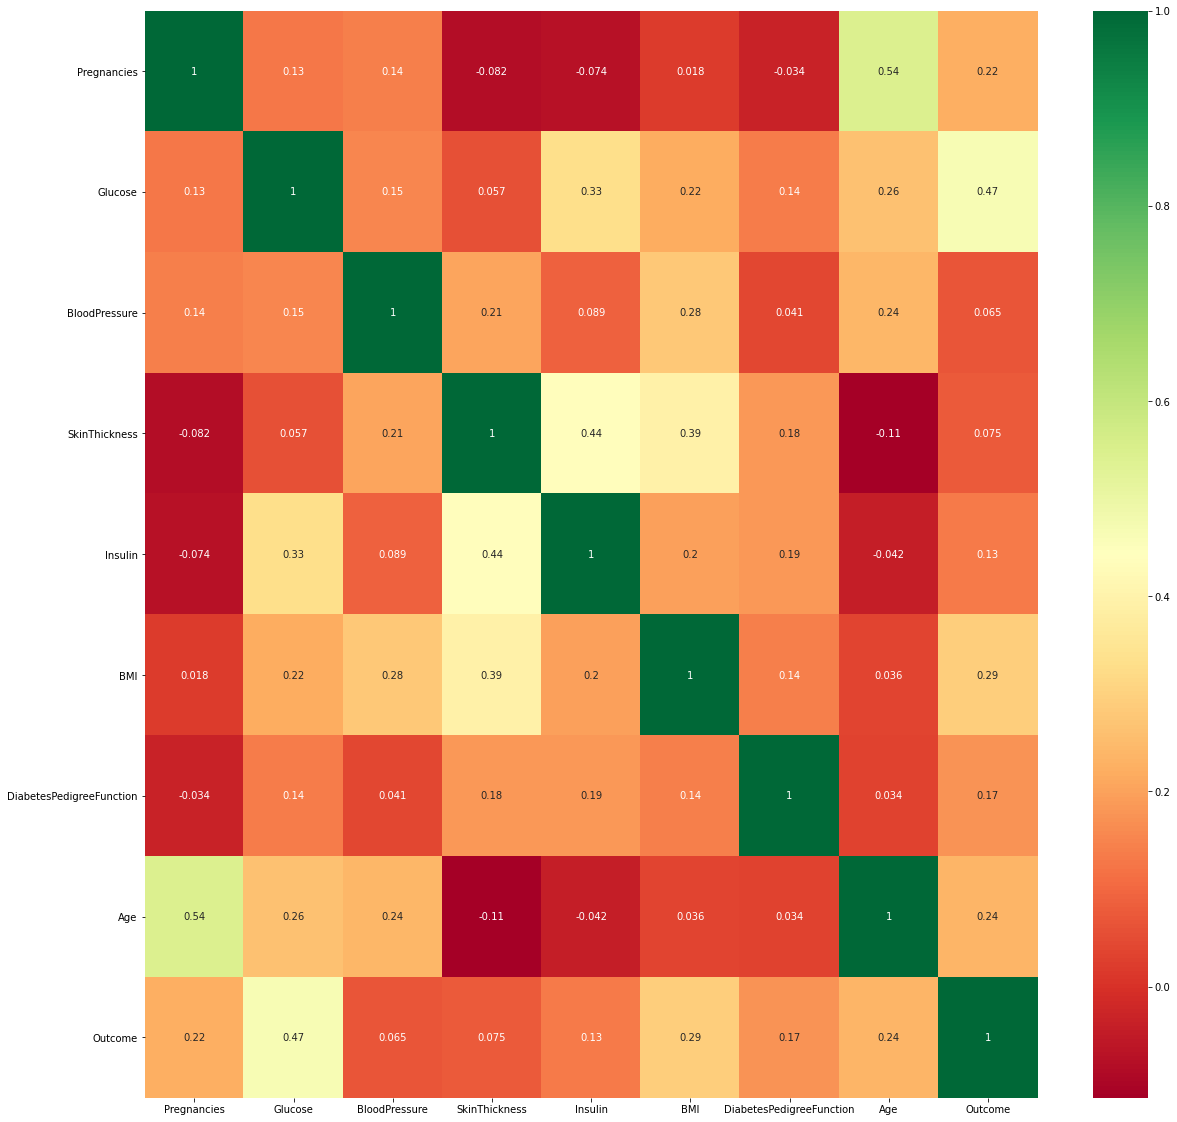

In [9]:
correlation_mat = df.corr()
corr_features = correlation_mat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(df[corr_features].corr(),annot=True,cmap='RdYlGn')
plt.show()

In [10]:
print('There are total',df['Outcome'].nunique(),'unique values in the outcome column')
print('Unique values in outcome column are',df['Outcome'].unique())

There are total 2 unique values in the outcome column
Unique values in outcome column are [1 0]


In [11]:
print('Total number of 0(False count) are',(df['Outcome']==0).sum())
print('Total number of 1(True count) are',(df['Outcome']==1).sum())

Total number of 0(False count) are 500
Total number of 1(True count) are 268


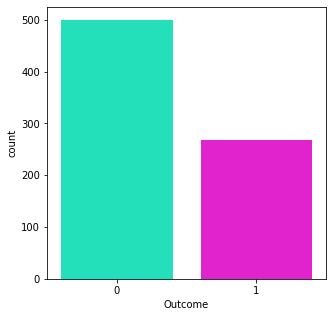

In [12]:
plt.figure(figsize=(5,5))
colors = ['#04FFCD','#FF04E6']
sns.countplot(x='Outcome',data=df,palette=colors)
plt.show()

In [13]:
df.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [14]:
print('Number of rows missing Glucose: {0}'.format(len(df.loc[df['Glucose'] == 0])))
print('Number of rows missing Blood Pressure: {0}'.format(len(df.loc[df['BloodPressure'] == 0])))
print('Number of rows missing Insulin: {0}'.format(len(df.loc[df['Insulin'] == 0])))
print('Number of rows missing BMI: {0}'.format(len(df.loc[df['BMI'] == 0])))
print('Number of rows missing Skin Thickness: {0}'.format(len(df.loc[df['SkinThickness'] == 0])))
print('Number of rows missing Age: {0}'.format(len(df.loc[df['Age'] == 0])))
print('Number of rows missing Diabetes Pedigree Function: {0}'.format(len(df.loc[df['DiabetesPedigreeFunction'] == 0])))

Number of rows missing Glucose: 5
Number of rows missing Blood Pressure: 35
Number of rows missing Insulin: 374
Number of rows missing BMI: 11
Number of rows missing Skin Thickness: 227
Number of rows missing Age: 0
Number of rows missing Diabetes Pedigree Function: 0


In [15]:
x = df['Glucose'].mean()
df['Glucose'].replace(0,x,inplace=True)
x = df['BloodPressure'].mean()
df['BloodPressure'].replace(0,x,inplace=True)
x = df['Insulin'].mean()
df['Insulin'].replace(0,x,inplace=True)
x = df['BMI'].mean()
df['BMI'].replace(0,x,inplace=True)
x = df['SkinThickness'].mean()
df['SkinThickness'].replace(0,x,inplace=True)

In [16]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.000000,79.799479,33.600000,0.627,50,1
1,1,85.0,66.000000,29.000000,79.799479,26.600000,0.351,31,0
2,8,183.0,64.000000,20.536458,79.799479,23.300000,0.672,32,1
3,1,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21,0
4,0,137.0,40.000000,35.000000,168.000000,43.100000,2.288,33,1
5,5,116.0,74.000000,20.536458,79.799479,25.600000,0.201,30,0
6,3,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26,1
7,10,115.0,69.105469,20.536458,79.799479,35.300000,0.134,29,0
8,2,197.0,70.000000,45.000000,543.000000,30.500000,0.158,53,1
9,8,125.0,96.000000,20.536458,79.799479,31.992578,0.232,54,1


In [29]:
y = df['Outcome']
X = df.drop(columns=['Outcome'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [30]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
334,1,95.0,60.000000,18.000000,58.000000,23.9,0.260,22
139,5,105.0,72.000000,29.000000,325.000000,36.9,0.159,28
485,0,135.0,68.000000,42.000000,250.000000,42.3,0.365,24
547,4,131.0,68.000000,21.000000,166.000000,33.1,0.160,28
18,1,103.0,30.000000,38.000000,83.000000,43.3,0.183,33
...,...,...,...,...,...,...,...,...
71,5,139.0,64.000000,35.000000,140.000000,28.6,0.411,26
106,1,96.0,122.000000,20.536458,79.799479,22.4,0.207,27
270,10,101.0,86.000000,37.000000,79.799479,45.6,1.136,38
435,0,141.0,69.105469,20.536458,79.799479,42.4,0.205,29


In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[-0.8362943 , -0.89585789, -0.99370784, ..., -1.20340503,
        -0.61421636, -0.94861028],
       [ 0.39072767, -0.56374882, -0.01067906, ...,  0.66490433,
        -0.90973787, -0.43466673],
       [-1.14304979,  0.43257839, -0.33835532, ...,  1.44097129,
        -0.30699103, -0.77729576],
       ...,
       [ 1.92450513, -0.69659245,  1.13618785, ...,  1.91523444,
         1.94892066,  0.42190587],
       [-1.14304979,  0.63184384, -0.24779635, ...,  1.4553429 ,
        -0.77514391, -0.34900947],
       [-1.14304979,  0.10046932,  1.9553785 , ..., -1.40460758,
        -0.60836445, -1.03426754]])

In [32]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 0.69748316, -0.79622517, -1.15754597, ...,  0.24812762,
        -0.11680393,  0.85019217],
       [-0.52953881, -0.33127247,  0.23507814, ...,  0.492445  ,
        -0.94192338, -1.03426754],
       [-0.52953881, -0.4641161 , -0.66603158, ..., -0.21176391,
        -0.91266382, -1.03426754],
       ...,
       [-1.14304979,  0.16689114,  0.64467346, ...,  0.57867466,
         0.97750343, -0.86295302],
       [ 0.69748316, -0.56374882, -0.17451719, ..., -0.21176391,
        -1.01799822,  0.33624861],
       [ 0.39072767, -1.49365422,  0.80851159, ...,  0.50681661,
        -0.91851573,  0.16493409]])

In [33]:
rfc_model = rfc(random_state=10)
rfc_model.fit(X_train_scaled, y_train.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [34]:
y_predicted = rfc_model.predict(X_test_scaled)
print("Accuracy of Random Forest Model is = {0: .3f}".format(metrics.accuracy_score(y_test,y_predicted)))


Accuracy of Random Forest Model is =  0.753


In [35]:
y_actual = y_test
y_actual = y_actual.to_numpy() #  COnverting to numpy array
y_actual

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0])

In [36]:
print("The mean squared error is:",mse(y_actual,y_predicted))

The mean squared error is: 0.24675324675324675


In [38]:
target_names = ['class 0', 'class 1']
print(classification_report(y_actual, y_predicted, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.82      0.79      0.81       151
     class 1       0.64      0.68      0.65        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.75      0.75       231



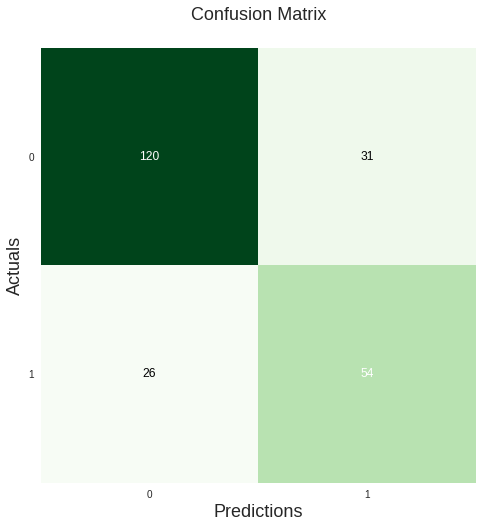

In [39]:
conf_matrix = confusion_matrix(y_true=y_actual, y_pred=y_predicted)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(8,8), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [40]:
params = {
    "learning_rate" : [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4],
    "max_depth" : [3,4,5,6,8,10,12,13,15],
    "min_child_weight" : [1,3,5,7],
    "gamma" : [0,0.1,0.2,0.3,0.4,0.42,0.45],
    "colsample_bytree" : [0.3,0.4,0.5,0.7],
}

In [41]:
xgb_model = xgboost.XGBClassifier(eval_metric='logloss')
random_search=RandomizedSearchCV(xgb_model,
                                 param_distributions=params,
                                 n_iter=5,
                                 scoring='roc_auc',
                                 n_jobs=1,
                                 cv=5,
                                 verbose=3
                                )

In [42]:
random_search.fit(X_train_scaled,y_train.ravel())

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] min_child_weight=1, max_depth=5, learning_rate=0.25, gamma=0.1, colsample_bytree=0.5 
[CV]  min_child_weight=1, max_depth=5, learning_rate=0.25, gamma=0.1, colsample_bytree=0.5, score=0.846, total=   0.2s
[CV] min_child_weight=1, max_depth=5, learning_rate=0.25, gamma=0.1, colsample_bytree=0.5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  min_child_weight=1, max_depth=5, learning_rate=0.25, gamma=0.1, colsample_bytree=0.5, score=0.815, total=   0.0s
[CV] min_child_weight=1, max_depth=5, learning_rate=0.25, gamma=0.1, colsample_bytree=0.5 
[CV]  min_child_weight=1, max_depth=5, learning_rate=0.25, gamma=0.1, colsample_bytree=0.5, score=0.833, total=   0.0s
[CV] min_child_weight=1, max_depth=5, learning_rate=0.25, gamma=0.1, colsample_bytree=0.5 
[CV]  min_child_weight=1, max_depth=5, learning_rate=0.25, gamma=0.1, colsample_bytree=0.5, score=0.756, total=   0.0s
[CV] min_child_weight=1, max_depth=5, learning_rate=0.25, gamma=0.1, colsample_bytree=0.5 
[CV]  min_child_weight=1, max_depth=5, learning_rate=0.25, gamma=0.1, colsample_bytree=0.5, score=0.808, total=   0.0s
[CV] min_child_weight=5, max_depth=4, learning_rate=0.3, gamma=0.45, colsample_bytree=0.5 
[CV]  min_child_weight=5, max_depth=4, learning_rate=0.3, gamma=0.45, colsample_bytree=0.5, score=0.860, total=   0.0s
[CV] min_child_weight=5, max_depth=4, lea

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  min_child_weight=5, max_depth=4, learning_rate=0.3, gamma=0.45, colsample_bytree=0.5, score=0.834, total=   0.0s
[CV] min_child_weight=5, max_depth=4, learning_rate=0.3, gamma=0.45, colsample_bytree=0.5 
[CV]  min_child_weight=5, max_depth=4, learning_rate=0.3, gamma=0.45, colsample_bytree=0.5, score=0.746, total=   0.0s
[CV] min_child_weight=5, max_depth=4, learning_rate=0.3, gamma=0.45, colsample_bytree=0.5 
[CV]  min_child_weight=5, max_depth=4, learning_rate=0.3, gamma=0.45, colsample_bytree=0.5, score=0.820, total=   0.0s
[CV] min_child_weight=7, max_depth=3, learning_rate=0.2, gamma=0.4, colsample_bytree=0.3 
[CV]  min_child_weight=7, max_depth=3, learning_rate=0.2, gamma=0.4, colsample_bytree=0.3, score=0.872, total=   0.0s
[CV] min_child_weight=7, max_depth=3, learning_rate=0.2, gamma=0.4, colsample_bytree=0.3 
[CV]  min_child_weight=7, max_depth=3, learning_rate=0.2, gamma=0.4, colsample_bytree=0.3, score=0.810, total=   0.0s
[CV] min_child_weight=7, max_depth=3, learnin

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    1.0s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           eval_metric='logloss', gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_a...
                   iid='deprecated', n_iter=5, n_jobs=1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                             

In [43]:
estimator = random_search.best_estimator_
estimator.missing=1
print(estimator)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, eval_metric='logloss',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=1, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [44]:
xgb_model = estimator

In [45]:
xgb_model.fit(X_train_scaled,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, eval_metric='logloss',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=1, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [46]:
y_predicted = xgb_model.predict(X_test_scaled)
y_predicted

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [47]:
score = cross_val_score(xgb_model,X_train_scaled,y_train.ravel(),cv=10)
score

array([0.77777778, 0.75925926, 0.77777778, 0.68518519, 0.74074074,
       0.81481481, 0.66666667, 0.71698113, 0.75471698, 0.83018868])

In [48]:
print("Score obtained after hyper parameter tuning in XgBoost is:",score.mean())

Score obtained after hyper parameter tuning in XgBoost is: 0.7524109014675051


In [49]:
target_names = ['class 0', 'class 1']
print(classification_report(y_actual, y_predicted, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.81      0.80      0.81       151
     class 1       0.63      0.65      0.64        80

    accuracy                           0.75       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.75      0.75       231



In [50]:
print("The mean squared error is:",mse(y_actual,y_predicted))

The mean squared error is: 0.2510822510822511


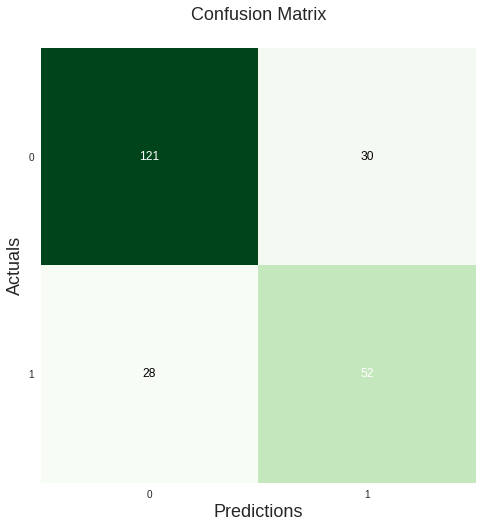

In [51]:
conf_matrix = confusion_matrix(y_true=y_actual, y_pred=y_predicted)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(8,8), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()